## Probability and distribution

### 3.1 Random Sampling

In [5]:
sample(1:40, 5) #(범위, 갯수)

[1]  1  9 36  2 12

In [8]:
# 범위or원소갯수 <<< 뽑는 갯수가 많아 질 경우, 중복을 허용해줘야한다.

# 중복허용 여부는 replace=T가 있냐
sample(c("H", "T"), 10)

ERROR: Error in sample.int(length(x), size, replace, prob): 'replace = FALSE' 일때는 모집단보다 큰 샘플을 가질 수 없습니다


In [9]:
sample(c("H", "T"), 10, replace=T)

[1] "T" "T" "T" "H" "T" "T" "H" "H" "T" "T"

In [10]:
# sampling with prob (*)
# 각 벡터별로 나올확률을 정해준다.


# 각 원소들 뽑을 확률도 벡터로 직접 지정해줄 수 있다 prob= 
# -> 이렇게 확률주고 뽑을 것이면, binomial 분포(이항분포)에서 뽑는 기능도 좋다
sample(c("succ", "fail"), 10, replace=T, prob = c(0.9, 0.1))

[1] "succ" "succ" "fail" "succ" "succ" "fail" "succ" "fail" "succ" "succ"

### 3.2 순열및 조합(Prob. Calculations and combinatorics)

![image-20220314101546036](https://raw.githubusercontent.com/is3js/screenshots/main/image-20220314101546036.png)


- 조합은  choose(n,r)으로 / 순열은 prod(n:r)로 바로 계산가능하다

In [11]:
# The probability to choose 5 numbers out of 40

# 1/ 40 C 5


1 / choose(40,5)

[1] 1.519738e-06

In [12]:
# 5!
prod(5:1) 

[1] 120

In [17]:
# 5! / 40 P 5 = 40,39,38,37,36 -> prod(40:36)

# my) 팩토리얼은 nPr에서 ->  r 입력이 아니라 ( n-c+1)을 입력해줘야한다.

prod(5:1) / prod(40:(40-5+1))

[1] 1.519738e-06

### 3.3 Discrete distributions
- 이항분포: 성공률이 p인 시행을, n번 반복시, 성공횟수 X라 할 때 -> X는 X~b(n, p)를 따른다.

- 이항분포를 f(x)로 나타내면, 아래와 같다
![image-20220314102456538](https://raw.githubusercontent.com/is3js/screenshots/main/image-20220314102456538.png)



### 3.4 연속분포 Continuous distributions

1. 정규분포: 평균+분산으로 정해지는 분포. 평균을 중심으로 내려가는 벨 모양의 분포
    ![image-20220314102647148](https://raw.githubusercontent.com/is3js/screenshots/main/image-20220314102647148.png)




### 3.5 The built-in distributions in R

- R에서 제공하는 분포구해주는 함수

- 확률밀도함수: Density or point probability
- 누적분포함수: Cumulated probability, distribution function
- 퀀타일값: Quantiles
- 정규/이항분포 등을 따를 때의 랜덤넘버: Pseudo-random numbers


※ For the normal distribution, these are named
`dnorm(확률밀도함수), pnorm(누적 확률함수 분포), qnorm(퀀타일), and rnorm(랜덤넘버)` (density,
probability, quantile, and random, respectively).

#### 3.5.1 Densities (분포들 마다 시각화)


#### 정규분포 with dnorm(x)

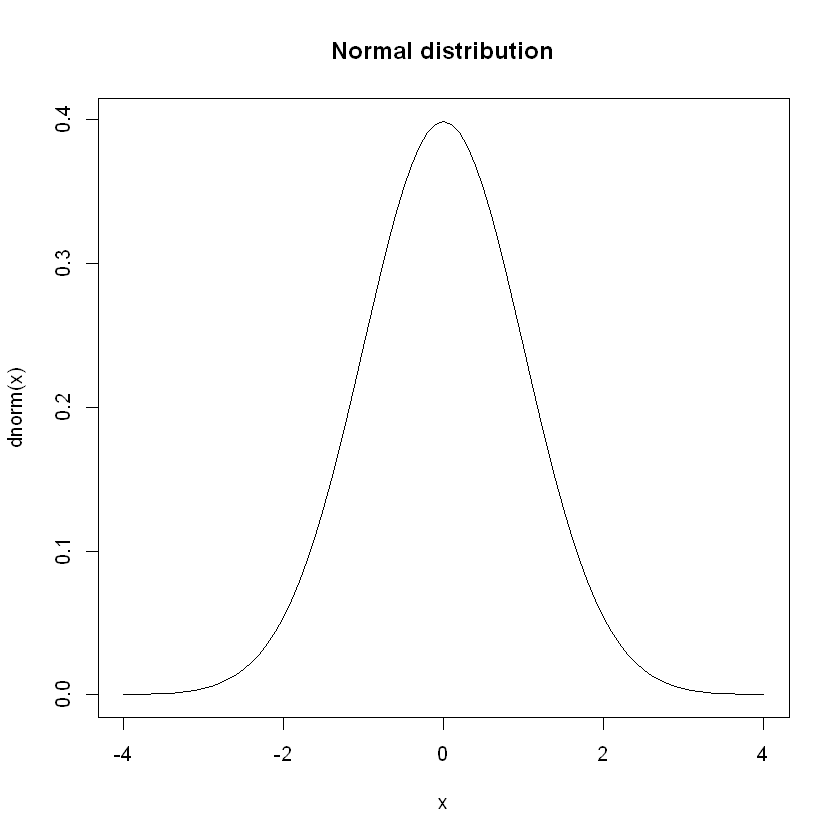

In [18]:
# 정규분포

x <- seq(-4,4,0.1) # 1. seq()으로 예시 x를 뽑았다.
plot(x,dnorm(x),type="l") # 2. plot + x와 y로는 확률밀도함수 dnorm(x)로 그렸다.
title("Normal distribution")

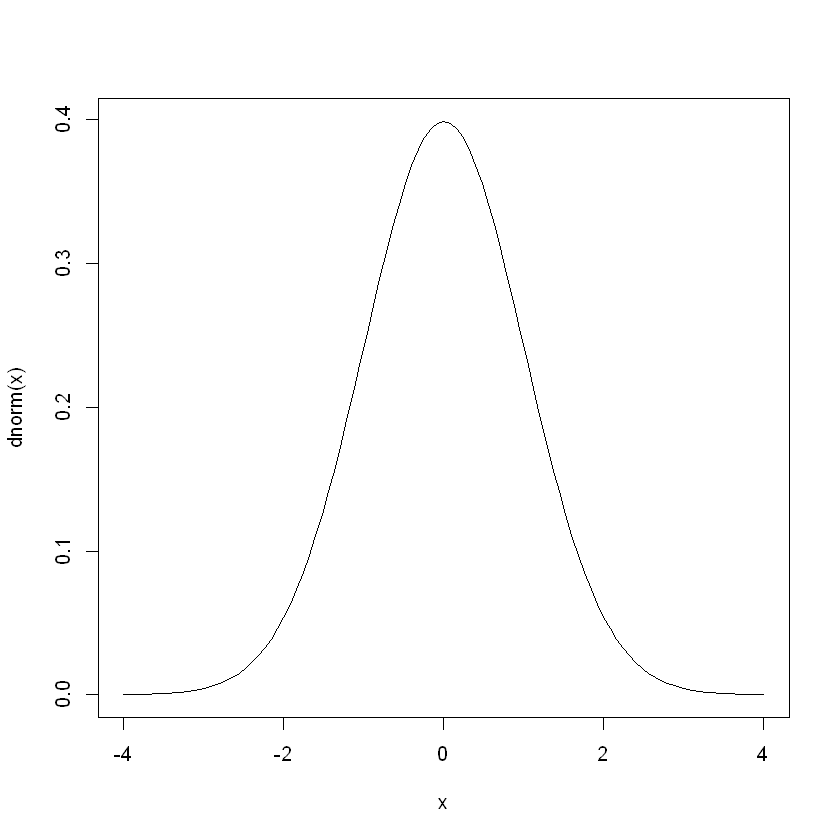

In [19]:
# 정규분포2 다른 방법 

# 예시x대신 from, to를 지정해주는 curve()를 이용한다. 
# y값으로 dnorm(x)
curve(dnorm(x), from=-4, to=4)  

#### 이항분포 with d binom(x)

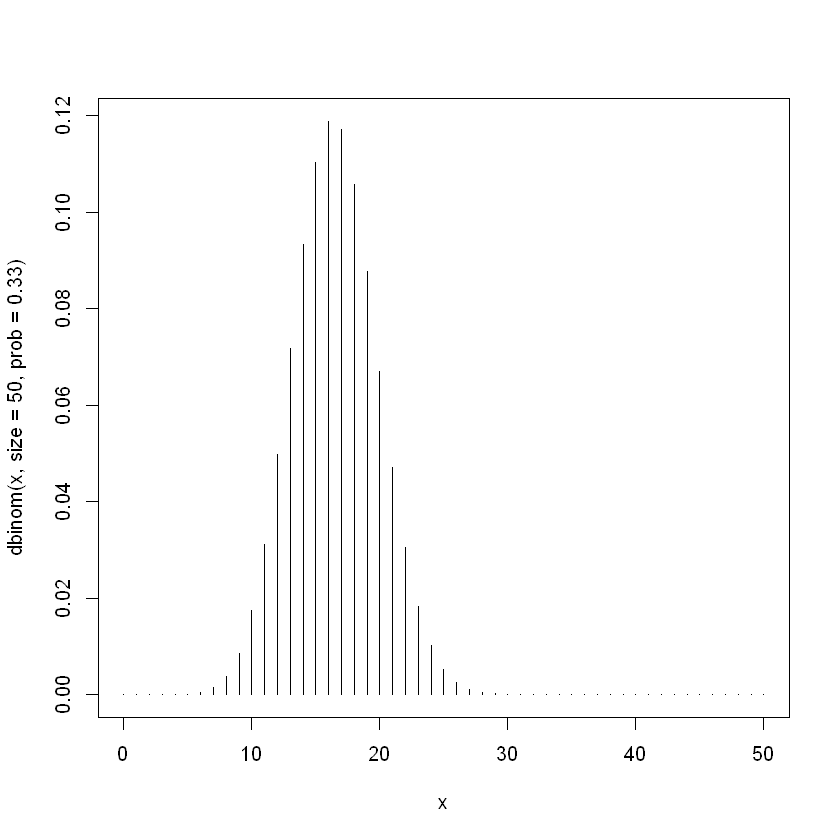

In [21]:
# 이항분포 b(n, p) = b(50, 0.33)

x <- 0:50 # 1. x를 인덱싱으로 0부터 n까지 정수로만 구성하고
plot(x,dbinom(x,size=50,prob=.33),type="h") # plot + y값으로 d bi nom을 이용했다.

#### 누적확률함수(왼쪽끝부터 k이하까지 확률) with p norm , p bi nom -> p-value

- 정규, 이항분포에 대한 누적확률분포를 예시를 듦
- **왼쪽끝부터 k이하까지의 면적 계산 함수**

![image-20220314110111639](https://raw.githubusercontent.com/is3js/screenshots/main/image-20220314110111639.png)



In [22]:
# 1. 정규분포를 따르는 확률변수 X~ N(132, 13^2)가 있다고 가정할 때, 
# Q. X가 160보다 클 확률은??
# -> 계산은 [k이하 확률]이 바로 나온다고 생각하자. 
# -> 1(전체확률) - (160이하 확률) = 160이상 확률


# my) 정규분포에서 [확률분포 그림상] 확률변수가 k이상/이하 확률 계산은 -> p norm으로 한다.

# 중요!
# my) [확률분포 그림] == [왼쪽 끝부터 k이하까지 누적되는 누적확률분포 p norm]으로 계산한다!


# 분포그림상 문제 -> 누적확률분포상 [왼쪽끝~k이하를 계산해주는 p norm]이용하기
1 - pnorm(160, mean=132, sd=13) # (왼쪽끝부터~k이하에서의 k ,  정규분포m, 정규분포sd)


[1] 0.01562612

![image-20220314111546993](https://raw.githubusercontent.com/is3js/screenshots/main/image-20220314111546993.png)



In [26]:
# 2. 이항분포의 왼쪽끝부터 누적확률분포 계산 by p bi norm

# 20명의 환자에게, A/B 두가지 시험을 각각 함
# -> 16명이 A를 더 좋아함.
# -> A가 더 좋은 treament인지에 대한 충분한 증거가 있는지 확인하기

# how? why?
# **A가 더 좋은 treament다 == 나오는 확률이 반반보다 높을 것이다.로 증명하고 잇넹**


# 1) A or Not A(B) 2가지 경우이며, 확률은 0.5 반반이라고 가정한다. -> 이항분포 따른다.
# 2) 귀무가설H0 -> p = 0.5 확률 반반이라고 정한다.. why?
# 3) p-value 계산 ->  귀무가설H0(p=0.5)하에  [현재상황인 X=16명]이상일 확률을 구한다.
#  -> 1 - P(X <=15명이하) 
#  --> my) 더 좋은 치료는 아니다 == 확률 반반이다 상태로 -> 현상황에서 꼭다리를 구함
# 4) [귀무가설하 꼭다리 = p-value]가 0.05보다 작다? -> 귀무가설 반반은 틀린 것.. 0.5보다 클 것이다. -> 더 좋은 치료다


1 - pbinom(15, size=20, prob=.5) # 계산결과가 p-value다

[1] 0.005908966

##### 중간 내 정리(누적확률분포 함수)

1. 정규든 이항이든 **누적확률분포**는 현재 확률변수 X가 가진 분포에 대해 **`왼쪽끝 ~ k이하`까지의 면적 계산해서 확률을 응답**해준다.

2. p-value 계산은 H0에서 `k이상일 확률(꼭다리)`를 물어볼 것이다. -> 
    - 1 - `(왼쪽끝~k이하) by 누적확률분포 함수` pnorm or p bi nom
    
3. case와 확률이 둘다 0.5인 treatment에서 -> 어떤 치료가 더 좋다?(반반 아니다)를 증명하려면?
    - `P=0.5가 아니다를 증명`해야하는데
    - **(1)뒤집어질 귀무가설**`P=0.5을 귀무가설`로 잡고 -> **(2)해당하는 분포 함수를 만들고**`이항분포`를 만들고 -> **(3)분포 함수내에서 p-value계산을 위해, H0의 x값 k를 구한 뒤, `1- (왼쪽끝~)k이하확률은 누적확률분포 함수에 k를 넣어서` -> p-value(k이상 확률)을 구한다**`k이상의 꼭다리 계산`후 -> 꼭다리 계산결과 자체가 = p-value이며 `p-value가 0.05가 낫다`를 증명해야한다.
    
    
- **`p norm이나 p bi nom` 등의 `누적확률분포 함수`로 -> 정규분포와 이항분포의 `p-value를 계산`할 수 있다.**

#### 3.5.3 퀀타일
![image-20220326113828445](https://raw.githubusercontent.com/is2js/screenshots/main/image-20220326113828445.png)

- 누적확률분포 함수의 inverse값이다.
    - 표준정규분포Z~N(0,1)를 예를 든다면, 왼쪽 끝 ~ 0(평균)까지는 1/2이다.
        - 즉 Pr(z<=0) = 1/2
        - 즉 파이(0) = 1/2
            - 파이 역함수(1/2) = 0
            - 여기서 1/2값이 0의 퀀타일?이다
    - 누적확률분포 함수(왼쪽끝부터 x까지) 상에서 f(x) = 1/2을 만들어내는 x값은? 0이다
        ![image-20220314114413382](https://raw.githubusercontent.com/is3js/screenshots/main/image-20220314114413382.png)



- 누적확률분포 함수의 역함수라는 것을 이용하면, **퀀타일로 `신뢰구간`을 구할 수 있다.**
    - **`95% CI(신뢰구간)` for m**이다?
        - 표준 정규분포 양측 총 5% 내에 들 확률?
        - 표준 정규분포 각 측의 2.5%내에 들 확률?
        - 표준 정규분포 (왼쪽끝~ N 0.025) = 0.025가 되는 값?
        - 표준 정규분포 (반대편에서 ~N 0.975) = 0.025가 되는 값?
        ![image-20220326114458834](https://raw.githubusercontent.com/is2js/screenshots/main/image-20220326114458834.png)

#### 퀀타일 qnorm 예시 -> 95% 신뢰구간

In [27]:
xbar <- 83

sigma <- 12
n <- 5 

# S/루트(n) = 표준오차
sem <- sigma/sqrt(n)
sem

[1] 5.366563

##### my) qnorm : 신뢰구간% / 100의 값에 대해 , 이미 정해진   Z분포에서 한쪽끝 확률을 0.5중앙에서부터 방향대로 주기
- qnorm(0.025)
    - 0.025 -> 한쪽끝 2.5% -> 양쪽 5%의 신뢰구간에 대해
    - 0.5부터 면적확률을 계산해주는 데,
        - 왼쪽으로 가면 음수 ex> qnorm(0.025) = N0.025 <-- N0.5 : 확률이 음수로
        - 오른쪽으로 가면 양수로 반환해주니 ex> N0.5 --> N0.975 : 확률이 양수로
    - xbar에서 편하게 더하기만 하면 된다.
        - xbar± Z(0.975) * s/sqrt(n)
            - xbar `- Z(0.975)` * s/sqrt(n) = **`xbar +qnorm(0.025) * s/sqrt(n)`**
            - xbar + Z(0.975) * s/sqrt(n) = = **`xbar +qnorm(0.975) * s/sqrt(n)`**

In [37]:
qnorm(0.025)

[1] -1.959964

In [34]:
qnorm(0.5)

[1] 0

In [30]:
# xbar - Z(0.975) * s/sqrt(n) = xbar +qnorm(0.025) * s/sqrt(n)
xbar + (sem * qnorm(0.025))

[1] 72.48173

In [29]:
xbar + Z(0.975) * s/sqrt(n) = = xbar +qnorm(0.975) * s/sqrt(n)
xbar + (sem * qnorm(0.975))

[1] 93.51827

#### 3.5.4 RandomNumber
- r norm: default 표준 정규분포 Z~N(0,1)
- r norm(n, mean=, sd=) : 정규분포
- r bi nom : 이항분포
    - rbinom(10, size=120, prob =.5)
    
    
- 정규분포/t-분포/카이분포/F분포 찾아보기

In [41]:
# 1. 표준 정규분포 Z~N(0,1) 10개
rnorm(10)

[1]  0.91390163  0.19712861  1.13355283  0.70927592 -0.11576228  1.91254937
 [7]  1.08309693 -0.79478811  0.05982768 -1.55241980

In [40]:
rnorm(10)

[1] -0.22783138 -0.75354205  1.18237437  1.39377400 -0.60764683 -1.30226568
 [7]  1.52846375 -0.06651068  1.64144344 -2.75795542

In [42]:
# 2. 정규분포
rnorm(10, mean=7, sd=5)

[1]  8.4584164 -1.2904380 11.0141512  3.9866641  5.1705574 11.4767823
 [7]  0.8165157 13.7678592  3.8622464 11.9287262

In [43]:
# 3. 이항분포
rbinom(10, size=120, prob =.5)

[1] 55 56 64 67 62 53 64 57 68 72

In [44]:
# 4. t분포 : dt, pt, qt, rt
rt(10)

ERROR: Error in rt(10): 기본값이 없는 인수 "df"가 누락되어 있습니다


## Chapter 4_Descriptive statistics and 2 graphics

### 4.1 Summary statistics for a single group 

In [46]:
x <- rnorm(50) # 표준정규분포 랜덤 50개

In [47]:
mean(x) #  평균

[1] -0.1131449

In [48]:
sd(x) #표준편차

[1] 1.000925

In [49]:
var(x) # 분산

[1] 1.001851

In [50]:
median(x) # 중앙값

[1] -0.07481688

In [52]:
quantile(x) # 4분위 값 -> 최소+최대, 1,3분위수, 중앙값  다 등장한다

0%         25%         50%         75%        100% 
-2.25870255 -0.58611041 -0.07481688  0.54128919  1.96959492

In [54]:
# 0~1까지를 0.1단위로 쪼갠 객체 만들어서
pvec <- seq(0, 1, 0.1)
pvec

[1] 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0

In [57]:
# 퀀타일을 4등분이 아닌 10등분으로 할 수 있다
quantile(x, pvec)

0%         10%         20%         30%         40%         50% 
-2.25870255 -1.63786099 -0.82875522 -0.44259933 -0.33993104 -0.07481688 
        60%         70%         80%         90%        100% 
 0.30232470  0.48920158  0.67033288  0.99983176  1.96959492

### In case there are missing values in data 

In [60]:
#  데이터 로딩
library("ISwR")
data(juul)

In [61]:
head(juul, 3)

age,menarche,sex,igf1,tanner,testvol
NA,NA,NA,90,NA,NA
NA,NA,NA,88,NA,NA
NA,NA,NA,164,NA,NA


In [62]:
# 칼럼에 바로 접근하기 위한 attach
attach(juul)

In [63]:
# 평균을 구하려고 하는데 -> NA하나라도 포함시 안구해짐
mean(igf1)

[1] NA

In [64]:
# NA(missing value) 빼고 구해라 (1) 평균 -> na.rm=T
mean(igf1, na.rm=T)

[1] 340.168

In [69]:
igf1

[1]  90  88 164 166 131 101  97 106 111  79  43  64  90 141  42  43 132  43
  [19]  36  86  44  68  89 101 115  53  94  95  76  79  71 121 201  96  29  80
  [37] 117  38 100 108  52 106 182 195 210 204  67  NA  68 148  NA  NA  NA  NA
  [55]  98  NA 242  NA  NA  NA 196  NA  NA  NA  NA 179  NA  NA 126  NA 142  NA
  [73]  NA  NA  NA  NA  NA  NA  NA 236 148  NA 174 136 164 160 215  NA  NA 214
  [91]  NA  NA 328 367  NA  NA  NA  NA  NA 149  NA 187  NA 103  NA 145  NA 117
 [109]  88  NA 186 235  NA  NA 300 188  NA 110 198 134  46  NA  NA  NA  NA 221
 [127] 225  NA  NA 166 324  NA 146 485 152 278 315 206 624 318 187 141  NA 152
 [145] 219 169  NA 115 223 295  NA 117 416  NA 149  NA 160  99  NA 490  NA  NA
 [163]  NA 101 238 283  NA  NA 279  NA  NA 171  NA  NA 224 174 179 104  NA  NA
 [181] 279  NA  NA 222 156 288 269 262  NA  NA  NA  NA 264 240 126 158 258 146
 [199]  NA 203 288  NA  NA 151 161 179 209  NA 292  NA 284 295  NA 138  NA 224
 [217] 204 245 267 195 418 223 232 138 190  NA 234 218 272 367 239 222 163  NA
 [235] 180 347 154  NA  NA 312 211 231 281 465 171 388  NA  NA 244 201 184  NA
 [253]  NA  NA  NA 225  NA 280 179  NA 246 157 280 284  NA 201  NA 239 261  NA
 [271] 329 227 271  NA 383  NA  NA  NA 164  NA 417 781 214  NA 232  NA 194  NA
 [289] 284 299  NA  NA  NA 186 271 281  NA  NA 252  71  NA  NA 237 188 325 208
 [307] 290 279 410 251  NA 153 269 299 163 348  NA 548  NA 269 493 258 419 387
 [325]  NA  NA 336 233 447 565 549 400 432 271 868 266 279 491  NA 419  NA  NA
 [343] 682 157 188 193 150  NA 493  NA  NA 495 345 167 915 488 422 287 374 242
 [361] 363  NA  NA 290 275  NA 499 448  NA 652 490 504  NA 435 348 653 288 453
 [379]  NA 743  NA 680 498 599 487  NA 701  NA 518  NA 517  NA 336 722 568 322
 [397] 801 548 305 564 473 669  NA 377 311 533  NA  NA  NA 374 349 747 443 590
 [415] 581 470 391 668  NA 442  NA 600 838 608 559 449 619 393 366 503 364  NA
 [433] 327 541 430  NA 488  NA 352 364 402  NA 349 447 477 483 504 581 518 412
 [451] 558 737 501 479 321 488 417 479 391 696 480 484 457 406 632 551 603 473
 [469] 461 785 553 738 362 453 616  NA 482  NA 371 517 285 520 434  NA 464 476
 [487] 405 396 428 618 361  NA 467 360 469 429 505 398 491 419 389 440 496 389
 [505] 535 312 389 407 404 489 420 444 476 525 390 768 364 419 318 444 500 440
 [523] 421 523 434 355 290 358 503 360 450 503 462 368 528 397 387 518 364 409
 [541] 492 412 495 471 286 630 259 326 394 431 421 356 332 291 418 293 223 286
 [559] 238 232 296 241 217 354 307 190 261 236 292 242 246 395 347 248 261 223
 [577] 356 304 261 183 172 215 205 107 178 185 221 176 170 256 257 232 158 203
 [595] 174 223 171 203  89 176 135 193 150 151 191 159 138 133 197 168 167 139
 [613] 174 134 105 160  92 222  NA 126  90 119 122 112  87 149 104  51  25  NA
 [631] 250  NA  NA 179 163 191 106  NA  NA 218 151 173 171 190 153 139 205  NA
 [649]  NA  NA 168 200  NA 169 123 139 388 223  93  NA  NA 328  NA  NA 178 157
 [667] 212  NA  NA 272  NA  NA  NA  NA  NA 113 202  NA 278 228  NA  NA  NA 235
 [685] 405  NA  NA 190  NA 247  NA  NA  NA  NA  NA  NA  NA 286  NA 187 209 196
 [703] 137  NA  NA  NA  NA  NA  NA 202 223  NA  NA  NA 177  NA 322 142  NA  NA
 [721]  NA  NA  NA 414 181  NA 304  NA 199  NA  NA 212 232 268 186 289  NA  NA
 [739] 143  NA  NA 171  NA  NA 210 564  NA  NA  NA 278 229 255 250 168  NA  NA
 [757]  NA  NA 234  NA 307 233  NA 141 234 242 242 356 255  NA 180  NA 111  NA
 [775] 296  NA 207 202 160  NA 254  NA  NA 127 144 135  NA 328 225  NA  NA 222
 [793] 153  NA 301 363  NA 368  NA 163 144 152  NA 221 181 256 309 221  NA 386
 [811] 185  NA 174 247 246 257 187  NA  NA  NA  NA 206 399  NA 270 212 340 243
 [829] 259 304  NA 341 156 290 229 323  NA  NA 199 242 267 248 421  NA  NA 284
 [847]  NA 387 290 158  NA 190 199 209 212  NA 271 186 215 224 243 199 383 504
 [865] 272 171 254 257  NA  NA 553 338 220  NA 179 399 494  NA 262 259  NA  NA
 [883] 168 347 122 187 459 464 187 229  NA 149 412  NA 349 259 184 104 278 439
 [901]  95 573 196  NA  NA  NA 281  NA 288 259 249 32

In [70]:
# NA(missing value) 의 갯수 -> sum() !is.na( 칼럼(데이터) ) : boolean mask의 -> 0or1 합 : 갯수

#sum(igf1, na.rm=T)

sum(!is.na(igf1))  # NA를 제외한 갯수

[1] 1018

In [71]:
summary(igf1) # NA의 갯수를 한번에

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   25.0   202.2   313.5   340.2   462.8   915.0     321 

#### summary후 연속형vs이산형(범주형) 확인해보기
- **`R에서 별말 없으면, 연속형, 양적인 변수`로 알아먹게 됨 -> `범주로 바꿔서 작업해야함`**
    - **최소값 = 제1 사분위수 = 중앙값 등이 같은 칼럼들은 범주형 변수을 확률이 높다.**
        - menarche, sex 등

In [72]:
# 모든 것에 대해 summary
summary(juul)

      age            menarche          sex             igf1      
 Min.   : 0.170   Min.   :1.000   Min.   :1.000   Min.   : 25.0  
 1st Qu.: 9.053   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:202.2  
 Median :12.560   Median :1.000   Median :2.000   Median :313.5  
 Mean   :15.095   Mean   :1.476   Mean   :1.534   Mean   :340.2  
 3rd Qu.:16.855   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:462.8  
 Max.   :83.000   Max.   :2.000   Max.   :2.000   Max.   :915.0  
 NA's   :5        NA's   :635     NA's   :5       NA's   :321    
     tanner        testvol      
 Min.   :1.00   Min.   : 1.000  
 1st Qu.:1.00   1st Qu.: 1.000  
 Median :2.00   Median : 3.000  
 Mean   :2.64   Mean   : 7.896  
 3rd Qu.:5.00   3rd Qu.:15.000  
 Max.   :5.00   Max.   :30.000  
 NA's   :240    NA's   :859     

##### 칼럼 타입 바꿔줄 때는, detach해놓고 작업한 뒤, 다시 attach

In [73]:
detach(juul)

In [75]:
juul$sex <- factor(juul$sex, labels = c("M", "F"))
juul$menarche <- factor(juul$menarche, labels = c("No", "Yes"))
juul$tanner <- factor(juul$tanner, labels = c("I","II","III","IV","V"))

In [76]:
attach(juul)

In [77]:
summary(juul)

      age         menarche     sex           igf1        tanner   
 Min.   : 0.170   No  :369   M   :621   Min.   : 25.0   I   :515  
 1st Qu.: 9.053   Yes :335   F   :713   1st Qu.:202.2   II  :103  
 Median :12.560   NA's:635   NA's:  5   Median :313.5   III : 72  
 Mean   :15.095                         Mean   :340.2   IV  : 81  
 3rd Qu.:16.855                         3rd Qu.:462.8   V   :328  
 Max.   :83.000                         Max.   :915.0   NA's:240  
 NA's   :5                              NA's   :321               
    testvol      
 Min.   : 1.000  
 1st Qu.: 1.000  
 Median : 3.000  
 Mean   : 7.896  
 3rd Qu.:15.000  
 Max.   :30.000  
 NA's   :859     

##### 칼럼 타입변경을 factor(개별$칼럼, labels = c()) 대신 transform()으로 한번에

In [80]:
# juuㅣ <- transform(juul,
# sex=factor(sex,labels=c("M","F")),
# menarche=factor(menarche,labels=c("No","Yes")),
# tanner=factor(tanner,labels=c("I","II","III","IV","V")))

### 4.2 Graphics display of distributions


#### 4.2.1 histograms

In [82]:
x = rnorm(50)
x

[1] -0.52318179  0.45145791  0.27500300  0.29214523 -1.39910743 -0.41635315
 [7] -1.08937240  1.96657592 -0.20159972  1.40125666  0.32521863  0.84543539
[13] -0.68310516 -0.98807106 -0.45228104 -0.94252471 -0.91854798  0.36420553
[19]  0.41766538 -0.35936325  0.03594079  0.37949555 -0.25425883 -0.59311175
[25] -0.44301932  1.16352475  0.48539764  1.84447025  0.98733199  1.14334552
[31] -0.79754701  0.97188313  0.43348743 -1.32271014 -0.06833728 -0.70376479
[37]  0.72048433  0.63008005 -1.03956574  0.28856782 -0.30351833  0.74185695
[43] -0.98642746 -0.75369949 -1.73608057 -0.70758248 -0.71205124 -0.25445455
[49] -0.05910218  2.27270928

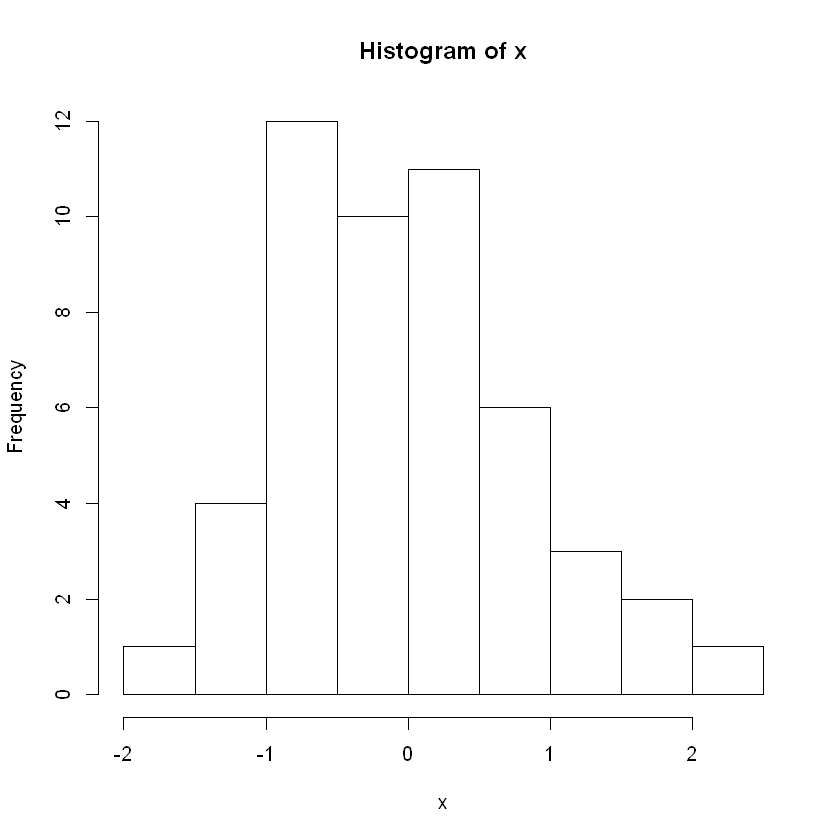

In [83]:
hist(x)

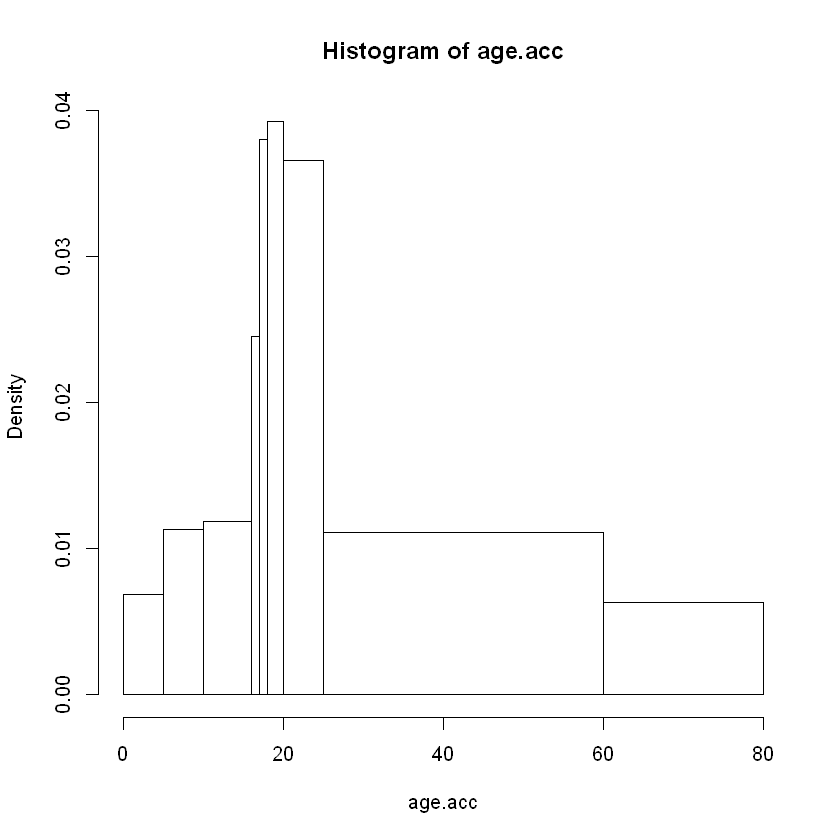

In [86]:
mid.age <- c(2.5,7.5,13,16.5,17.5,19,22.5,44.5,70.5)
acc.count <- c(28,46,58,20,31,64,149,316,103)
age.acc <- rep(mid.age,acc.count)

brk <- c(0,5,10,16,17,18,20,25,60,80)

hist(age.acc, breaks=brk)

#### 4.2.2 Empirical cumulative distribution -> 데이터가 정규분포 따르는지 보기 위함
- x이하인 것의 갯수 시그마 I(X<=x)
    - I(X <= x): x보다 작거나 같으면 1, 아니면 0
    - 그것들의 누적합
    
- x보다 작은 것의 누적 합
![image-20220326125712006](https://raw.githubusercontent.com/is2js/screenshots/main/image-20220326125712006.png)

In [88]:
# 총 갯수n 
n <- length(x)
n

[1] 50

In [94]:
(1:n)/n

[1] 0.02 0.04 0.06 0.08 0.10 0.12 0.14 0.16 0.18 0.20 0.22 0.24 0.26 0.28 0.30
[16] 0.32 0.34 0.36 0.38 0.40 0.42 0.44 0.46 0.48 0.50 0.52 0.54 0.56 0.58 0.60
[31] 0.62 0.64 0.66 0.68 0.70 0.72 0.74 0.76 0.78 0.80 0.82 0.84 0.86 0.88 0.90
[46] 0.92 0.94 0.96 0.98 1.00

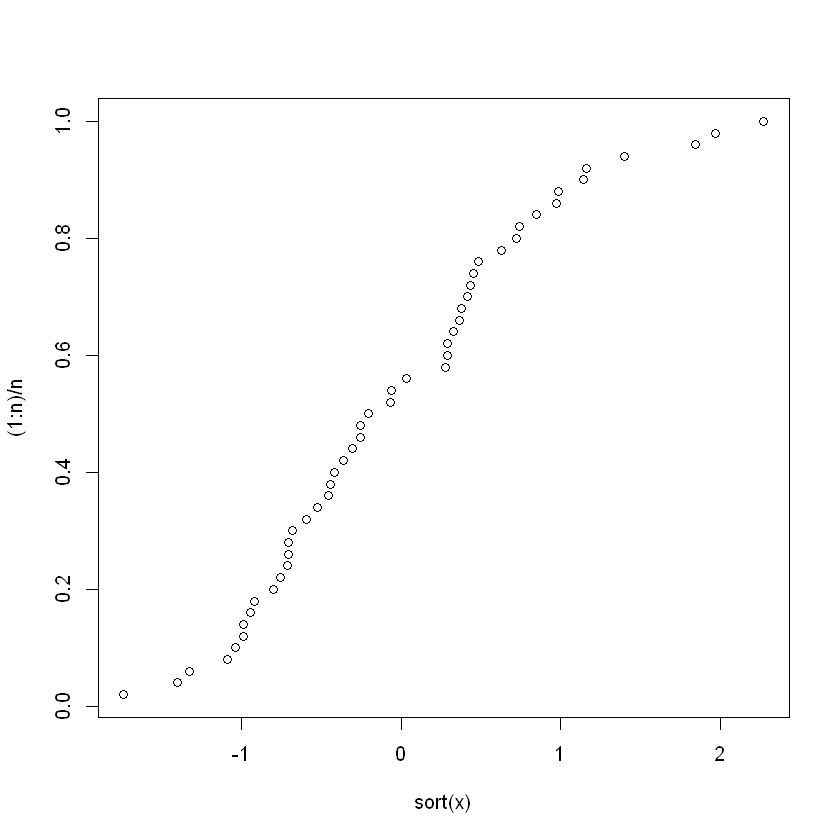

In [95]:
# x를 정규분포 50개를 순서대로 놓아두고,  
# y는 총갯수에 대해 1,2,3,4... n 까지 나열하는데 값을 /50 ->   0부터 1까지를 50등분?

# x정규분포 50개의 값과 무관하게,
# y는 0부터 1까지 점점 커지는 n등분
plot( sort(x), (1:n)/n)

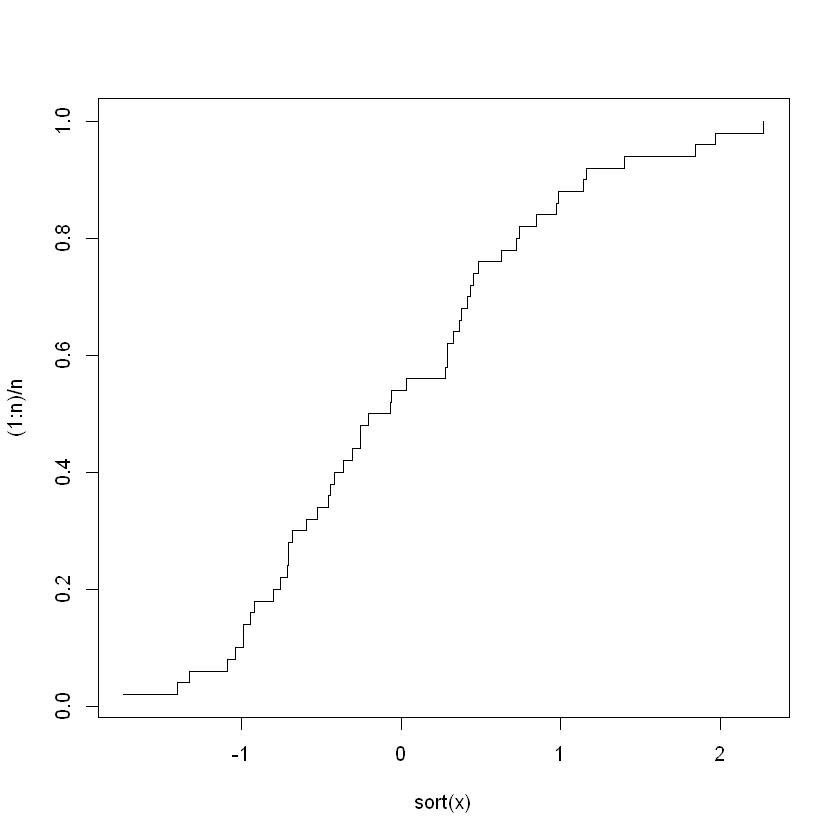

In [97]:
# x정규분포 50개의 값과 무관하게,
# y는 0부터 1까지 점점 커지는 n등분

# type="s"를 통해, 산점도를 계단식의 선으로 표현
plot( sort(x), (1:n)/n,
     type="s"
    )

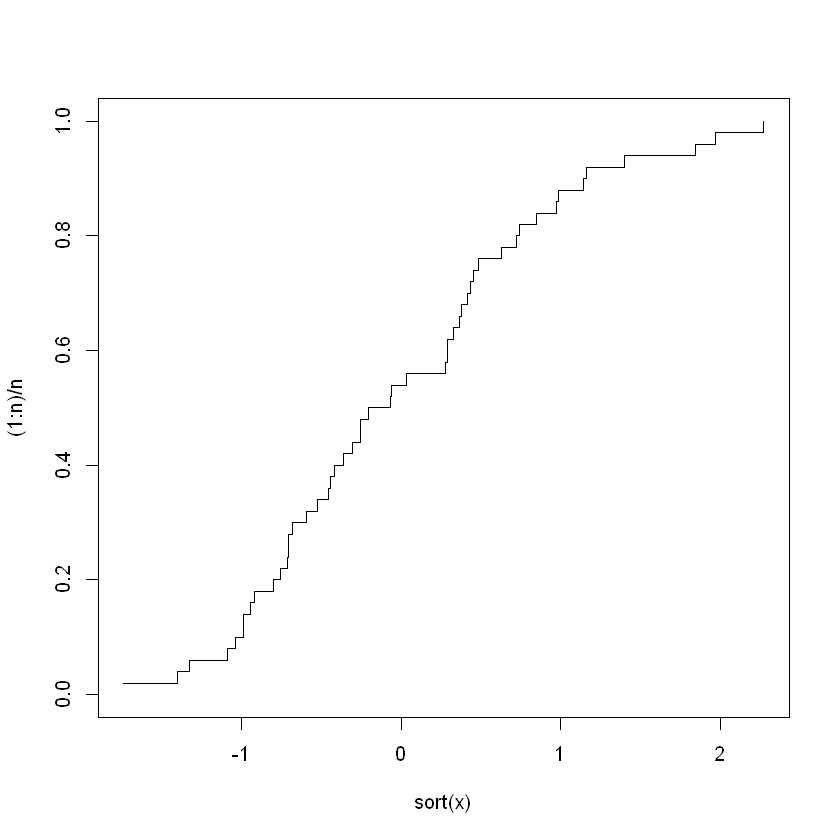

In [98]:
# x정규분포 50개의 값과 무관하게,
# y는 0부터 1까지 점점 커지는 n등분 -> n개의 x에 대해, 자신의 위치?

# type="s"를 통해, 산점도를 계단식의 선으로 표현
plot( sort(x), (1:n)/n,
     type="s",
     ylim=c(0,1)
    )

In [100]:
# 실제로 쓰는 함수
library("stats")
ecdf(x)

Empirical CDF 
Call: ecdf(x)
 x[1:50] = -1.7361, -1.3991, -1.3227,  ..., 1.9666, 2.2727

#### 4.2.3 Q-Q plots (quantile versus quantile plots) -> 정규분포 따르는지 확인 그래프2
- 정규분포를 따른다고 가정했을 때 vs 실제 엠피리칼 누적분포
    - **정규분포를 따르면, 일직선으로 나온다.**
    ![image-20220326130727906](https://raw.githubusercontent.com/is2js/screenshots/main/image-20220326130727906.png)

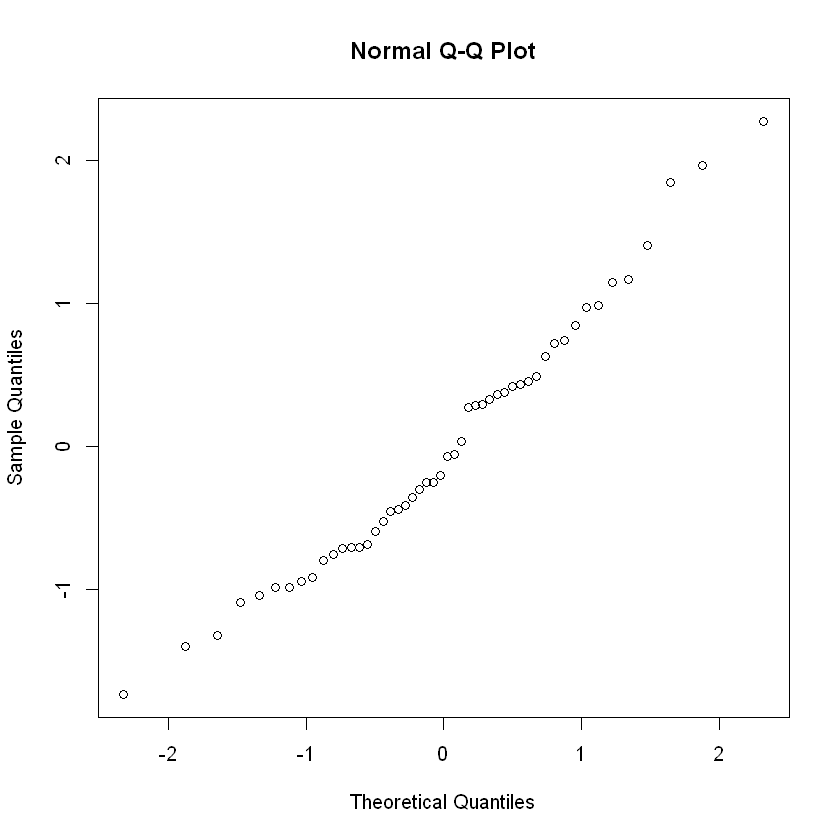

In [101]:
qqnorm(x)

#### 4.2.4 Boxplots
- 원래그림 vs 로그변환그림으로 상자그림을 그려보자

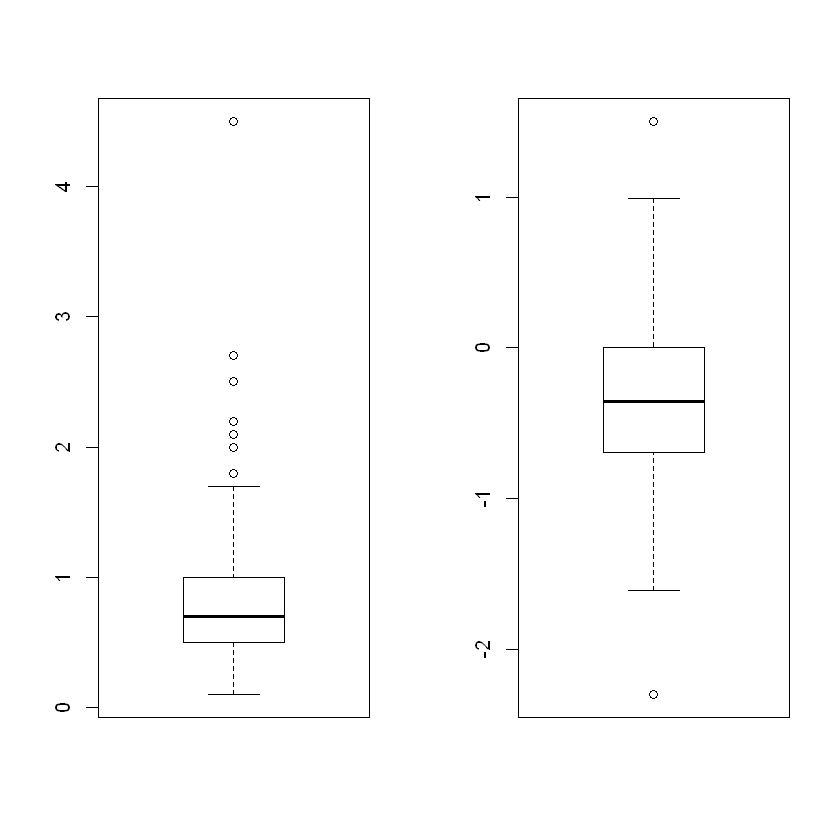

In [102]:
library(ISwR)

par(mfrow=c(1,2))
boxplot(IgM)
boxplot(log(IgM)) # 


# 복구
par(mfrow=c(1,1))

### 4.3 Summary statistics by groups 그룹별 통계량

#### tapply(집계변수, 그룹변수, 집계함수) -> 개별 집계값

In [106]:
attach(red.cell.folate)

head(red.cell.folate, 3)
#  folate ventilation
# 1 243 N2O+O2,24h
# 2 251 N2O+O2,24h
# 3 275 N2O+O2,24h


# 그룹별 folate의 평균
tapply(folate,ventilation,mean)

The following objects are masked from red.cell.folate (pos = 3):

    folate, ventilation



folate,ventilation
243,"N2O+O2,24h"
251,"N2O+O2,24h"
275,"N2O+O2,24h"


N2O+O2,24h  N2O+O2,op     O2,24h 
  316.6250   256.4444   278.0000

In [109]:
# 그룹별 folate의 표준편차

tapply(folate,ventilation,sd)

N2O+O2,24h  N2O+O2,op     O2,24h 
  58.71709   37.12180   33.75648

In [112]:
# 그룹별 folate의  갯수?

tapply(folate,ventilation,length)

N2O+O2,24h  N2O+O2,op     O2,24h 
         8          9          5

#####  그룹평 평균(xbar), n(length), s(표준편차) by tapply -> cbind로 묶은 객체 만들기

In [113]:
xbar <- tapply(folate, ventilation, mean)
s <- tapply(folate, ventilation, sd)
n <- tapply(folate, ventilation, length)

cbind(mean=xbar, std.dev=s, n=n)

,mean,std.dev,n
"N2O+O2,24h",316.6250,58.71709,8
"N2O+O2,op",256.4444,37.12180,9
"O2,24h",278.0000,33.75648,5


##### NA가 포함된 그룹별 통계는 na.rm=T 옵션넣어 tapply

In [114]:
tapply(igf1, tanner, mean)

I  II III  IV   V 
 NA  NA  NA  NA  NA

In [115]:
tapply(igf1, tanner, mean, na.rm=T)

I       II      III       IV        V 
207.4727 352.6714 483.2222 513.0172 465.3344

#### aggregate  : 그룹별 개별집계(tapply) 말고 한꺼번에 집계

In [117]:
# aggregate( 집계칼럼(들), 그룹칼럼을 list()로, 집계함수, 옵션)
aggregate( juul[c("age","igf1")], list(sex=juul$sex), mean, na.rm=T)


sex,age,igf1
M,15.38436,310.8866
F,14.84363,368.1006


#### 그룹별 통계는 by가 제일 편하다

In [119]:
# by( 데이터, 데이터$그룹칼럼,  집계함수)
by( juul, juul["sex"], summary)

sex: M
      age        menarche   sex          igf1        tanner       testvol      
 Min.   : 0.17   No  :  0   M:621   Min.   : 29.0   I   :291   Min.   : 1.000  
 1st Qu.: 8.85   Yes :  0   F:  0   1st Qu.:176.0   II  : 55   1st Qu.: 1.000  
 Median :12.38   NA's:621           Median :280.0   III : 34   Median : 3.000  
 Mean   :15.38                      Mean   :310.9   IV  : 41   Mean   : 7.896  
 3rd Qu.:16.77                      3rd Qu.:430.2   V   :124   3rd Qu.:15.000  
 Max.   :83.00                      Max.   :915.0   NA's: 76   Max.   :30.000  
                                    NA's   :145                NA's   :141     
------------------------------------------------------------ 
sex: F
      age        menarche   sex          igf1        tanner       testvol   
 Min.   : 0.25   No  :369   M:  0   Min.   : 25.0   I   :224   Min.   : NA  
 1st Qu.: 9.30   Yes :335   F:713   1st Qu.:233.0   II  : 48   1st Qu.: NA  
 Median :12.80   NA's:  9           Median :352.0   I

## 4.4 Graphics for grouped data 그룹데이터(1개칼럼 범주별)에 대한 그래프

#### 4.4.1 Histograms 그룹별 [범주형 빈도분포] 비교 by 히스토그램

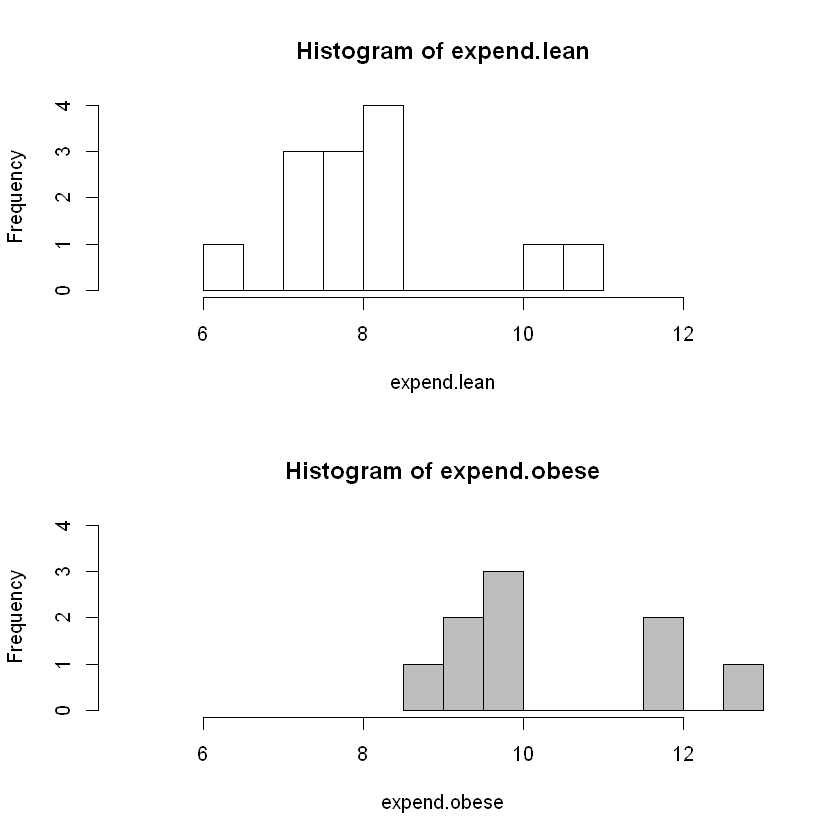

In [120]:
attach(energy)

expend.lean <- expend[stature=="lean"] # 범주종류별로 개별칼럼 만들기 by 인덱싱
expend.obese <- expend[stature=="obese"] # 범주종류별로 개별칼럼 만들기

# 범주종류별 개별칼럼을 개별로 그리기
par(mfrow=c(2,1))
hist(expend.lean,breaks=10, xlim=c(5,13),ylim=c(0,4),col="white")
hist(expend.obese,breaks=10, xlim=c(5,13),ylim=c(0,4),col="grey")


par(mfrow=c(1,1)) 

#### 4.4.2 Parallel boxplots 그룹별 [숫자형 분포] 비교


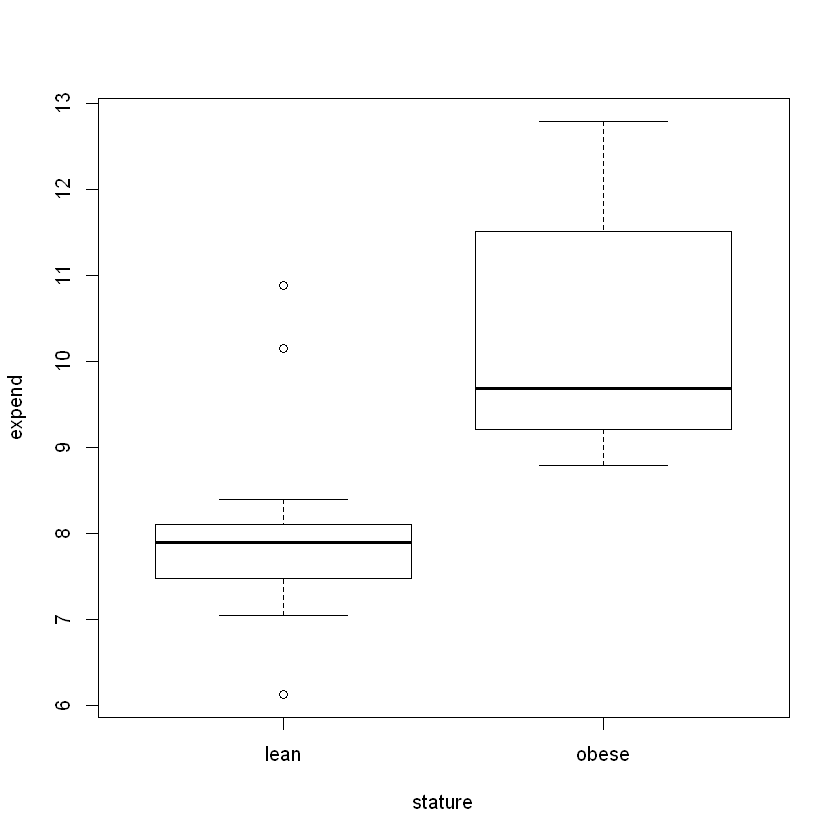

In [124]:
# 히스토그램과 달리, 범주그룹을 지정만 해주면 된다

# boxplot(데이터 ~ 범주종류를 가진 범주칼럼)
boxplot(expend ~ stature)

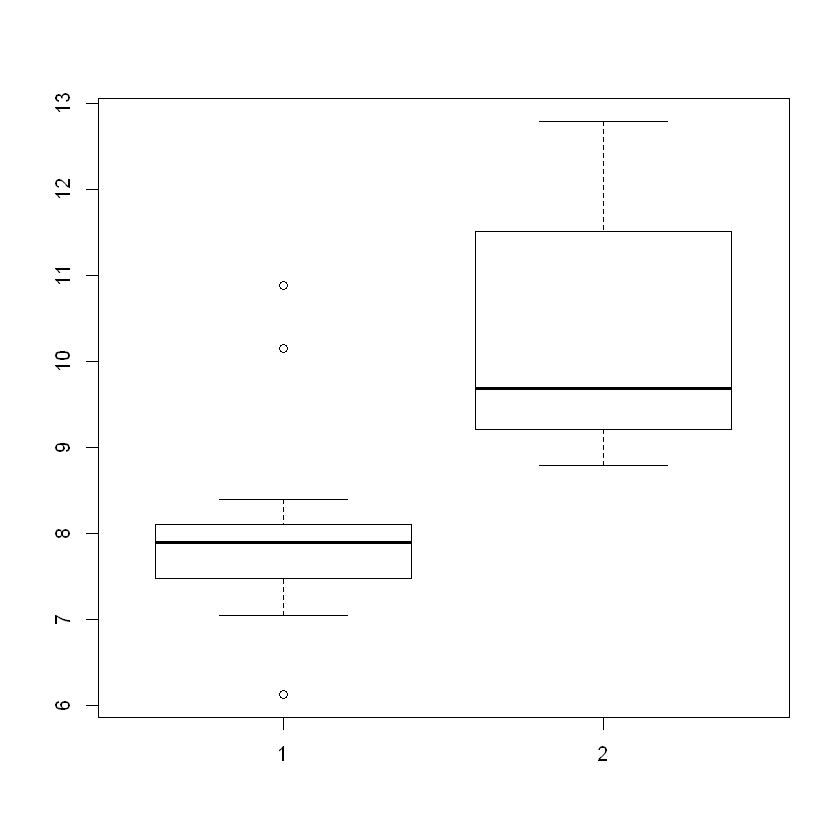

In [126]:
# 2케이스를 칼럼으로 뽑아서 각각 그려줘도 된다.

# boxplot(범주1칼럼, 범주2칼럼)
boxplot(expend.lean, expend.obese)

#### 4.4.3 Stripcharts: 그룹별 데이터가 적을 땐, 상자그림보다는 raw데이터 직접 그리기
- 데이터가 작은 그룹별 숫자 분포

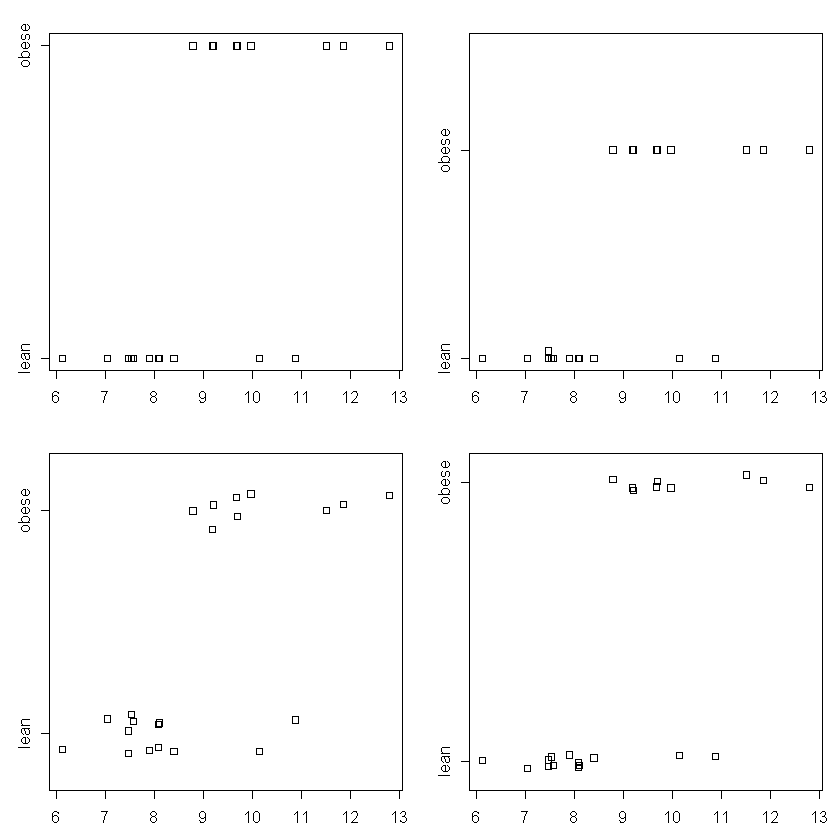

In [127]:
opar <- par(mfrow=c(2,2), mex=0.8, mar=c(3,3,2,1)+.1)


stripchart(expend ~ stature) # 1x1 : 
stripchart(expend ~ stature, method="stack") # 1x2 stack
stripchart(expend ~ stature, method="jitter") # 2x1 겹치는 것을 피하기 위해 약간 흔들어서
stripchart(expend ~ stature, method="jitter", jitter=.03) # 2x2 덜 세게 흔들기
par(opar)

![image-20220326150529509](https://raw.githubusercontent.com/is2js/screenshots/main/image-20220326150529509.png)



### 4.5 Tables

#### 4.5.1 Generating tables

1. 알트만 자료를 예시데이터로 c() -> `matrix()` byrow
2. matrix에 `colnames`, `rownames` 벡터로 넣어주기
3. matrix에 row전체이름, col전체이름을  `names(dimnames())`에 벡터로 넣어주기
4. matrix -> table -> dataframe으로 만들기 by `as.data.frame(as.table( matrix ))`

In [131]:
caff.marital <- matrix(c(652,1537,598,242,36,46,38,21,218,327,106,67), nrow=3,byrow=T)


caff.marital

652,1537,598,242
36,46,38,21
218,327,106,67


In [132]:
# 벡터로 칼럼 네임을 준다. 
colnames(caff.marital) <- c("0","1-150","151-300",">300")

In [133]:
# 벡터로 row 네임을 준다.
rownames(caff.marital) <- c("Married","Prev.married","Single")


In [134]:
# 네임을 개별적으로 주고난 뒤 데이터로 확인함
caff.marital

,0,1-150,151-300,>300
Married,652,1537,598,242
Prev.married,36,46,38,21
Single,218,327,106,67


In [135]:
# dim names()를 벡터로 준다. 
# 여기선 안보이는 듯 -> matrix -> table -> dataframe으로 만들면 보이게 된다.

names(dimnames(caff.marital)) <- c("marital","consumption")

In [136]:
caff.marital

,0,1-150,151-300,>300
Married,652,1537,598,242
Prev.married,36,46,38,21
Single,218,327,106,67


![image-20220326151306132](https://raw.githubusercontent.com/is2js/screenshots/main/image-20220326151306132.png)

In [137]:
# matrix -> table -> dataframe


as.data.frame(as.table(caff.marital))

# 실제 작업을 한다면, 첫번째 case는 652만큼 더 읽어라? 로 작업? by rep

marital,consumption,Freq
Married,0,652
Prev.married,0,36
Single,0,218
Married,1-150,1537
Prev.married,1-150,46
Single,1-150,327
Married,151-300,598
Prev.married,151-300,38
Single,151-300,106
Married,>300,242


#### table()함수로 범주형의 빈도수 간단하게 세기

In [138]:
head(juul, 2)

age,menarche,sex,igf1,tanner,testvol
NA,NA,NA,90,NA,NA
NA,NA,NA,88,NA,NA


In [139]:
# sex칼럼에대한 빈도
table(sex)

sex
  M   F 
621 713 

In [141]:
# sex별, menarche별 빈도
table( sex, menarche)

   menarche
sex  No Yes
  M   0   0
  F 369 335

##### xtabs, ftable 도 비슷한 기능임
- table > xtabs> ftable

In [142]:
xtabs( ~ sex + menarche, data=juul)

   menarche
sex  No Yes
  M   0   0
  F 369 335

#### 4.5.2 Marginal tables and relative frequency
- table()의 결과 빈도표에 적용하는 `margin.table()`메서드

In [150]:
tanner.sex <- table( tanner, sex )
tanner.sex 

      sex
tanner   M   F
   I   291 224
   II   55  48
   III  34  38
   IV   41  40
   V   124 204

In [151]:
margin.table( tanner.sex , 1) # 가로1 -> 행별로 빈도수 총합 보기 (row그룹의 범주별 빈도만 보기)

tanner
  I  II III  IV   V 
515 103  72  81 328 

In [154]:
margin.table( tanner.sex , 2) # 세로2 -> col그룹의 범주별 빈도만 보기

sex
  M   F 
545 554 

##### prop.table( )  : table(범주빈도표)에 대해 비율로 보기

In [155]:
prop.table( tanner.sex, 1)

      sex
tanner         M         F
   I   0.5650485 0.4349515
   II  0.5339806 0.4660194
   III 0.4722222 0.5277778
   IV  0.5061728 0.4938272
   V   0.3780488 0.6219512

In [156]:
prop.table( tanner.sex, 2)

      sex
tanner          M          F
   I   0.53394495 0.40433213
   II  0.10091743 0.08664260
   III 0.06238532 0.06859206
   IV  0.07522936 0.07220217
   V   0.22752294 0.36823105

### 4.6 Graphical display of tables


#### 4.6.1 Barplots : table로 구한 범주별빈도표의 시각화
1. matrix -> margin.table -> 범주형1개에 대한 종류별 빈도 -> barplot

In [160]:
caff.marital # matrix

,0,1-150,151-300,>300
Married,652,1537,598,242
Prev.married,36,46,38,21
Single,218,327,106,67


In [163]:
total.caff <- margin.table( caff.marital, 2) # 칼럼종류렬 빈도만 보기 
total.caff

consumption
      0   1-150 151-300    >300 
    906    1910     742     330

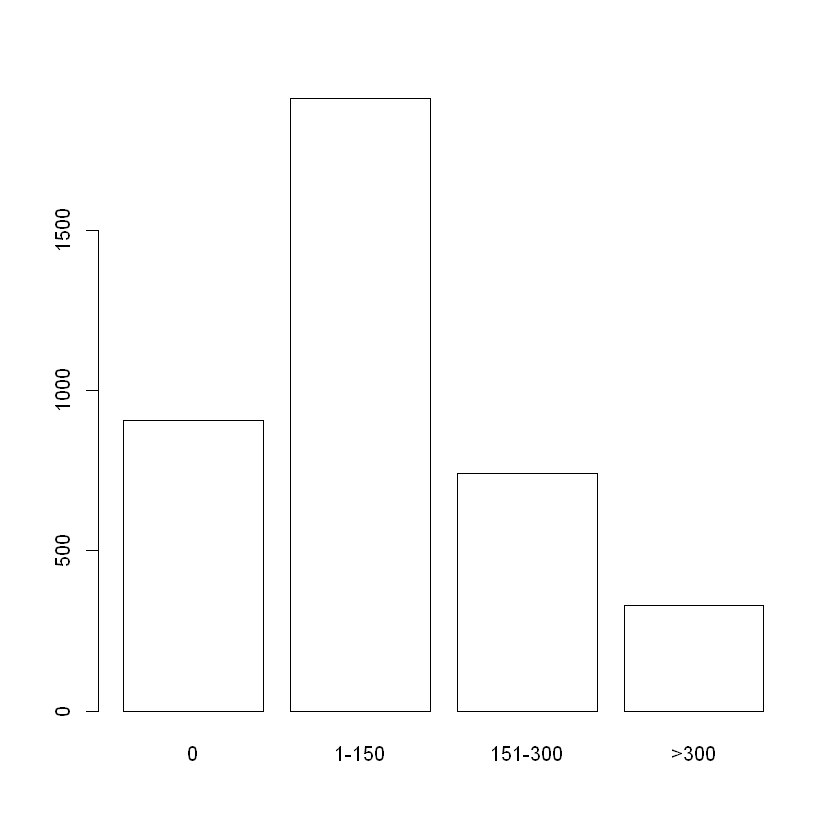

In [164]:
#  종류1개의 그룹별 빈도 시각화
barplot( total.caff, col="white")

##### 만약 2개의 matrix 빈도표(table)이라면, 자동으로 stack barplot을 그린다
- t ( )는 행렬을 바꾸는 메서드
- beside=T : stack을 푸는 옵션
- **`prop.table(  ,2)`: stack을 beside=T로 풀어줄 때, row=x축이 아닌 `col의 범주종류들별로 풀어진 상태 -> prop.table( , 2)로 각 덩어리들의 합을 1로 가지는 비율로 그린다.**

In [165]:
caff.marital

,0,1-150,151-300,>300
Married,652,1537,598,242
Prev.married,36,46,38,21
Single,218,327,106,67


In [166]:
t(caff.marital)

,Married,Prev.married,Single
0,652,36,218
1-150,1537,46,327
151-300,598,38,106
>300,242,21,67


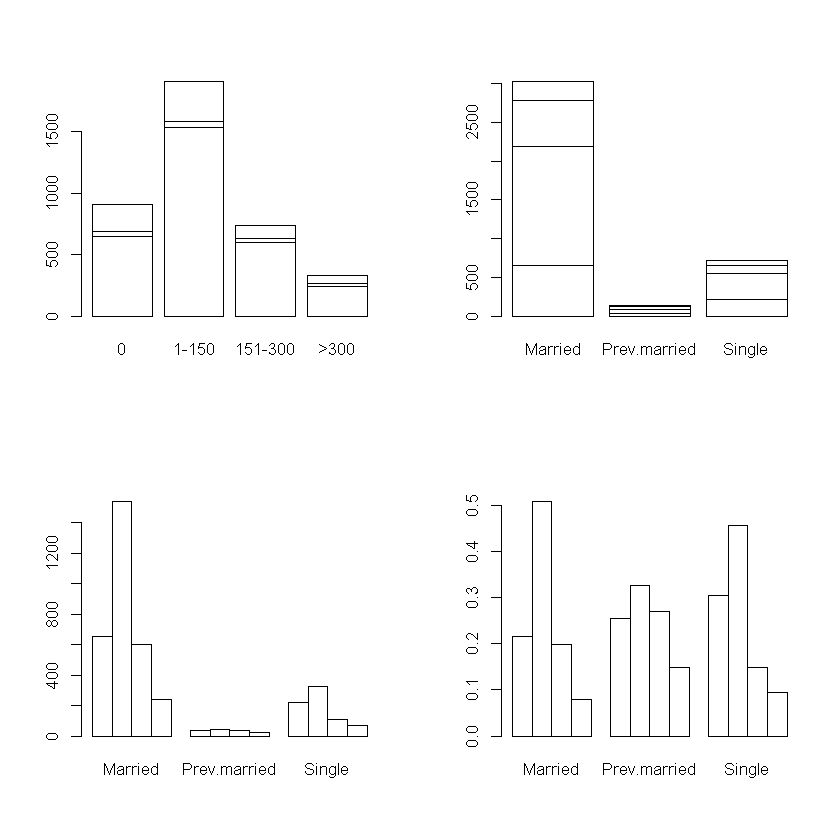

In [175]:
par(mfrow = c(2,2))

barplot(caff.marital, col="white") # matrix형태의 barplot은 자동 stack
barplot(t(caff.marital), col="white")  # t()로 뒤집어서 반대가 stack으로 들어가고 stack은 x축으로 표기됨


barplot(t(caff.marital), col="white", beside = T) # stack을 푸는 옵션
barplot(prop.table(t(caff.marital),2) , col="white", beside = T) # 빈도수 -> 비율로 바꾸는 옵션
# prop.table(  ,2)로 주어서, 세로칼럼별 = stack이 풀려져있는 덩어리들별로.. 비율구해주기


par(mfrow=c(1,1))

##### Using legend : 2개이상의 칼럼의 빈도 -> 1개는 stack or beside -> legend로 설명해줘야한다.
- row에 가있는 칼럼은 x축으로 범주종류들(그룹별)이 소개된다
    - col에 있던 -> stack or beside 들은 `legend.text =` 에 `colnames()`로 받은 벡터를 넣어준다.


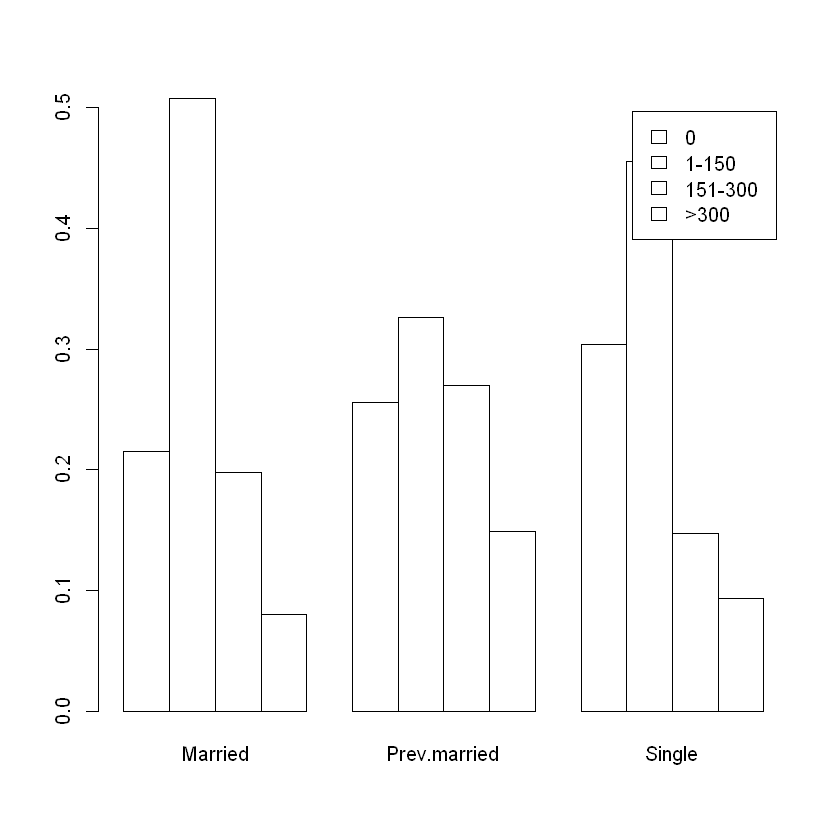

In [178]:
# legend.text = colnames(caff.marital) : stack, beside = col에 있던 그룹칼럼 -> colnames로 넣어준다.

barplot(prop.table(t(caff.marital),2) , col="white", beside = T,
       
        legend.text = colnames(caff.marital)
       )

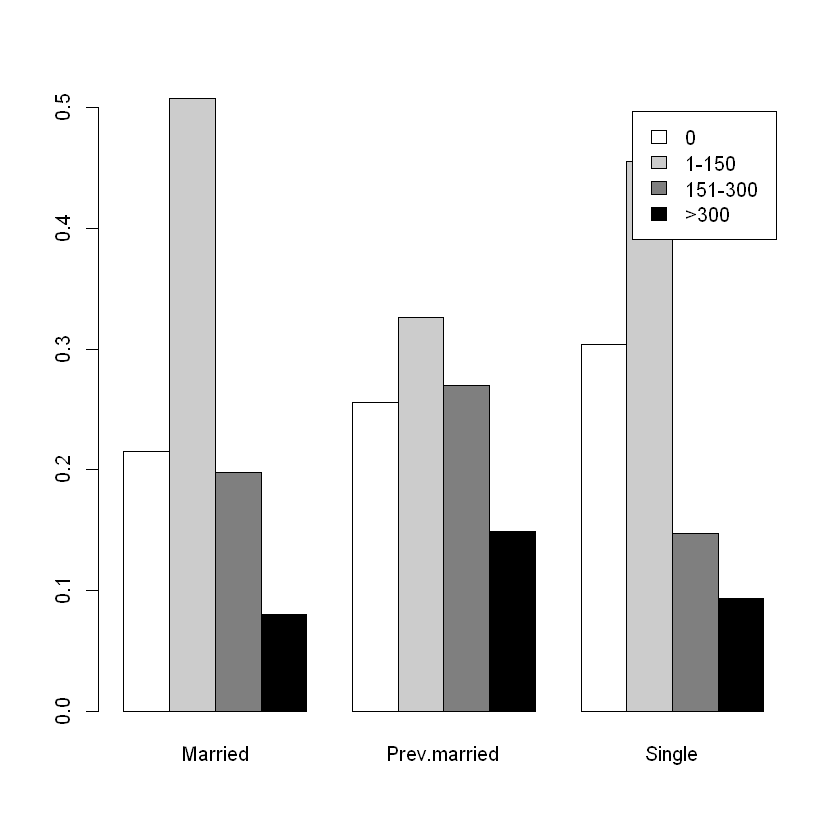

In [182]:
# col = "white " 1개 -> stack/beside에 맞게 컬러도 갯수를 주면 그대로 반영해준다.

barplot(prop.table(t(caff.marital),2) , beside = T,
       
        legend.text = colnames(caff.marital),
        col = c("white", "grey80", "grey50", "black")
       )

#### 4.6.2 Dotcharts: barplot의 데이터가 적을 때
- 숫자형: boxplot -> Stripcharts
- 범주형: barplot -> dotchats
![image-20220326160633415](https://raw.githubusercontent.com/is2js/screenshots/main/image-20220326160633415.png)

- 빈도에 대해 한눈에 보인다.
    ![image-20220326160729263](https://raw.githubusercontent.com/is2js/screenshots/main/image-20220326160729263.png)

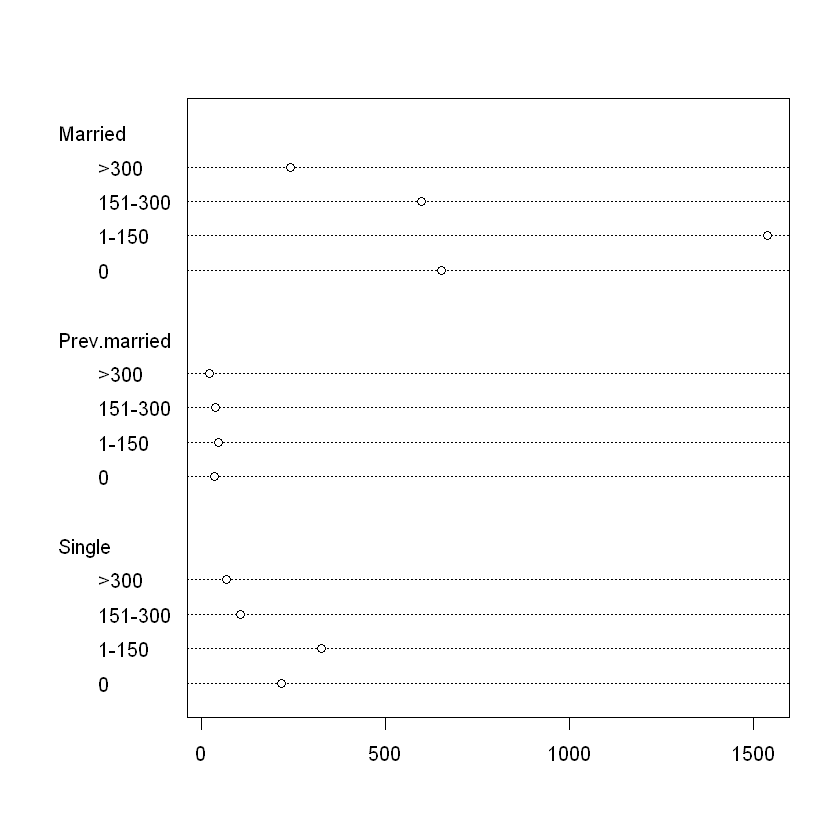

In [183]:
dotchart(t(caff.marital), lcolor="black")

# row가 왼쪽에 먼저
# col은 왼쪽에 depth넣고

#### 4.6.3 Piecharts

- 1개의 범주형에 대해 못그리니 **직접 칼럼범주종류별? 행종류별? 인덱싱해놓고 거기서의 분포를 본다.**

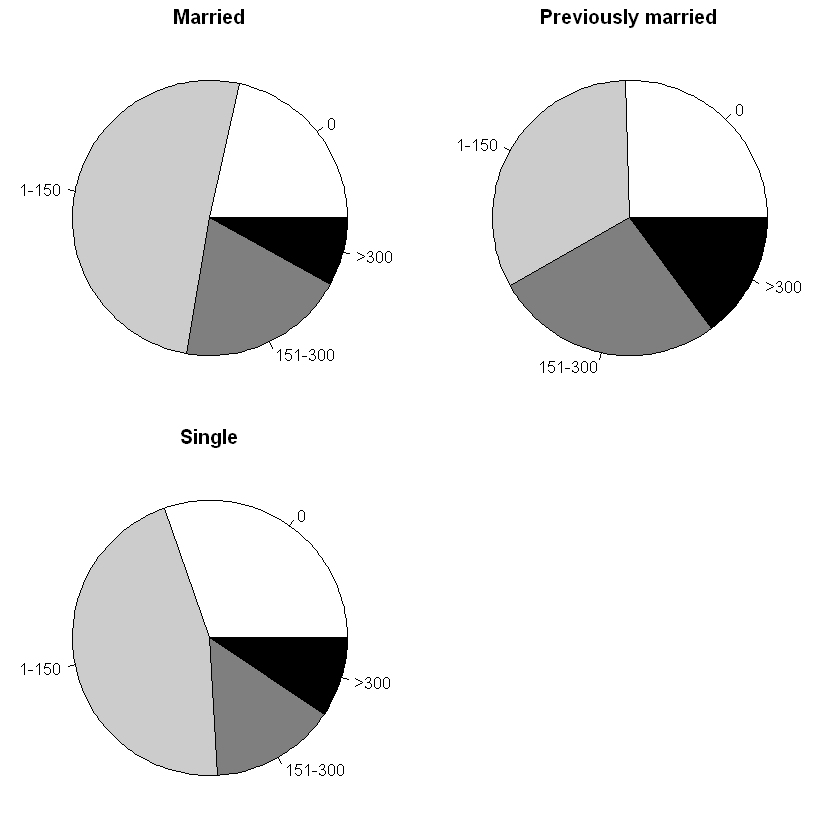

In [184]:
opar <- par(mfrow=c(2,2),mex=0.8,mar=c(1,1,2,1))


slices <- c("white","grey80","grey50","black") # col=에 넣을 컬러들 미리 빼놓기


pie(caff.marital["Married",], main="Married", col=slices)

pie(caff.marital["Prev.married",], main="Previously married", col=slices)

pie(caff.marital["Single",], main="Single", col=slices)

par(opar)

### 정리: 그룹별그림 boxplot-stripchart or barplot-dotchart or piechart 선택